<a href="https://colab.research.google.com/github/daniellemsampaio/Projetos/blob/main/MIT_Smart_Manufacturing_M2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **MIT - SMART MANUFATURING**
**Aluna**: Danielle Mendes de Almeida Sampaio

**Módulo 02 - Atividade avaliável: Tendências em um conjunto de dados e aplicação da média móvel**

***Parte A:***
*Crie uma visualização baseada no tempo. Depois, compartilhe detalhes sobre qualquer tendência que tiver notado.*

***Parte B:***
*Crie uma nova coluna no lado esquerdo e gere um valor de média móvel com 100 amostras de cada passo. Depois, crie um gráfico de dispersão usando os dados originais e os novos dados de média móvel. Os valores no eixo X do gráfico de dispersão devem ser os passos de tempo. Os dados no eixo Y devem ser os valores de diâmetro.*

1. *Que diferenças você pode identificar entre os dois gráficos de dispersão?  (Ou seja, o dos dados originais e o da média móvel com 100 amostras a cada passos). Descreva uma das mais importantes.*
2. *Calcule a média e o desvio padrão para:*
* *O diâmetro medido original;*
* *A medição do diâmetro médio em movimento.*
3. *Como o desvio padrão muda em comparação com a média entre as duas medições no passo 3? Compartilhe suas observações.*

In [1]:
# Importar as Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.fft import fft, ifft

plt.style.use('seaborn-pastel')

In [2]:
# Carregar os dados e visualização prévia
df = pd.read_excel('MITPE_Smart Manufacturing_Module2_Experiment_OpenLoop_Moving_average__[PT]-1.xlsx')
print('O dataframe possui',len(df),'registros organizados em',len(df.columns),'colunas.')
print('')
df.head()

O dataframe possui 1000 registros organizados em 10 colunas.



,Tempo - velocidade medida,Rotações por segundo da bobina - velocidade medida,Tempo - diâmetro medido,Diâmetro (mm) - diâmetro medido,Tempo - velocidade alvo,Rotações por segundo da bobina - velocidade alvo,Tempo - diâmetro previsto,Diâmetro (mm) - diâmetro previsto,Tempo - temperatura,Diâmetro (mm) - temperatura
0,94,0.533333,94,0.559985,94,0.5,94,0.449188,94,89.6821
1,95,0.566667,95,0.559985,95,0.5,95,0.449188,95,89.6821
2,96,0.566667,96,0.559985,96,0.5,96,0.449188,96,89.6821
3,97,0.566667,97,0.546315,97,0.5,97,0.449188,97,89.6821
4,98,0.600000,98,0.546315,98,0.5,98,0.449188,98,89.6821


In [3]:
# Verificar os tipos de dados
print('Na tabela abaixo podemos observar os tipos de dados do dataframe:')
print('')
pd.DataFrame({'tipos':df.dtypes, 'missing':df.isna().sum()})

Na tabela abaixo podemos observar os tipos de dados do dataframe:



,tipos,missing
Tempo - velocidade medida,int64,0
Rotações por segundo da bobina - velocidade medida,float64,0
Tempo - diâmetro medido,int64,0
Diâmetro (mm) - diâmetro medido,float64,0
Tempo - velocidade alvo,int64,0
Rotações por segundo da bobina - velocidade alvo,float64,0
Tempo - diâmetro previsto,int64,0
Diâmetro (mm) - diâmetro previsto,float64,0
Tempo - temperatura,int64,0
Diâmetro (mm) - temperatura,float64,0


In [4]:
# Carregar dados da tranformada de Fourrier feito no Excel
df_FFT = pd.read_excel('MITPE_Smart Manufacturing_Module2_Experiment_OpenLoop_Moving_average__[PT]-1_FFT.xlsx')

Nos gráficos a seguir podemos observar o comportamento das variáveis em função do tempo:



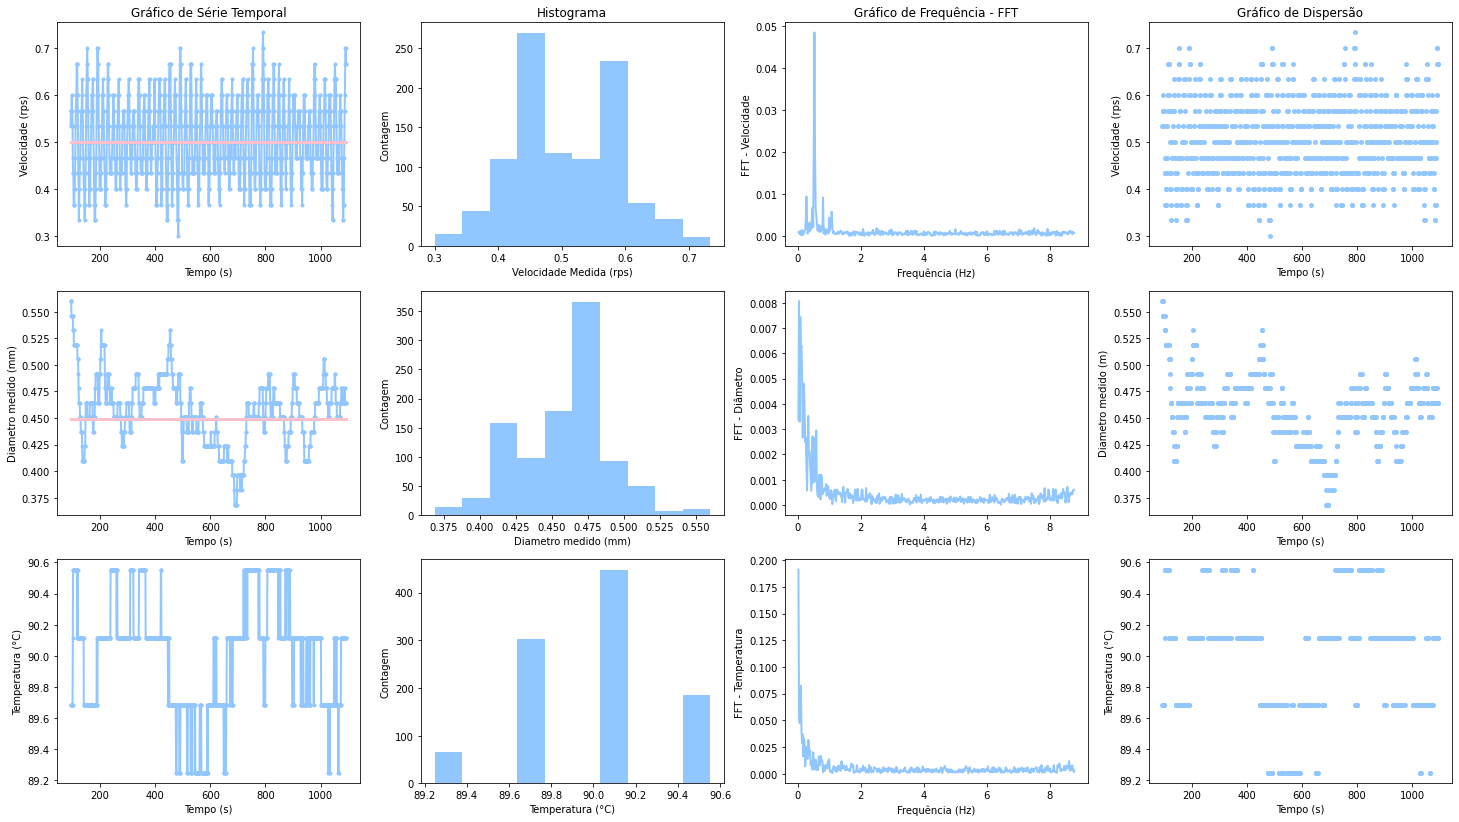

In [5]:
# Representar graficamente as variáveis em função do tempo
print('Nos gráficos a seguir podemos observar o comportamento das variáveis em função do tempo:')
print('')

plt.figure(figsize=(25, 14))

plt.subplot(3, 4, 1)
plt.plot(df[['Tempo - velocidade medida']],df[['Rotações por segundo da bobina  - velocidade medida']],marker='.',linewidth=2)
plt.plot(df[['Tempo - velocidade alvo']],df[['Rotações por segundo da bobina - velocidade alvo']],color = 'pink',linewidth=3)
plt.title('Gráfico de Série Temporal')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (rps)')

plt.subplot(3, 4, 2)
plt.hist(df['Rotações por segundo da bobina  - velocidade medida'])
plt.title('Histograma')
plt.xlabel('Velocidade Medida (rps)')
plt.ylabel('Contagem')

plt.subplot(3, 4, 3)
plt.plot(df_FFT[['Frequencia']].values[1:450],df_FFT[['Amplitude - velocidade medida']].values[1:450],linewidth=2)
plt.title('Gráfico de Frequência - FFT')
plt.xlabel('Frequência (Hz)')
plt.ylabel('FFT - Velocidade')

plt.subplot(3, 4, 4)
plt.scatter(df[['Tempo - velocidade medida']],df[['Rotações por segundo da bobina  - velocidade medida']],marker='.',linewidth=2)
plt.title('Gráfico de Dispersão')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (rps)')

plt.subplot(3, 4, 5)
plt.plot(df[['Tempo - diâmetro medido']],df[['Diâmetro (mm) - diâmetro medido']],marker='.',linewidth=2)
plt.plot(df[['Tempo - diâmetro previsto']],df[['Diâmetro (mm) - diâmetro previsto']],color = 'pink',linewidth=3)
plt.xlabel('Tempo (s)')
plt.ylabel('Diametro medido (mm)')

plt.subplot(3, 4, 6)
plt.hist(df['Diâmetro (mm) - diâmetro medido'])
plt.xlabel('Diametro medido (mm)')
plt.ylabel('Contagem')

plt.subplot(3, 4, 7)
plt.plot(df_FFT[['Frequencia']].values[1:450],df_FFT[['Amplitude - diametro medido']].values[1:450],linewidth=2)
plt.xlabel('Frequência (Hz)')
plt.ylabel('FFT - Diâmetro')

plt.subplot(3, 4, 8)
plt.scatter(df[['Tempo - diâmetro medido']],df[['Diâmetro (mm) - diâmetro medido']],marker='.',linewidth=2)
plt.xlabel('Tempo (s)')
plt.ylabel('Diametro medido (m)')

plt.subplot(3, 4, 9)
plt.plot(df[['Tempo - temperatura']],df[['Diâmetro (mm) - temperatura']],marker='.',linewidth=2)
plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura (°C)')

plt.subplot(3, 4, 10)
plt.hist(df['Diâmetro (mm) - temperatura'])
plt.xlabel('Temperatura (°C)')
plt.ylabel('Contagem')

plt.subplot(3, 4, 11)
plt.plot(df_FFT[['Frequencia']].values[1:450],df_FFT[['Amplitude - temperatura']].values[1:450],linewidth=2)
plt.xlabel('Frequência (Hz)')
plt.ylabel('FFT - Temperatura')

plt.subplot(3, 4, 12)
plt.scatter(df[['Tempo - temperatura']],df[['Diâmetro (mm) - temperatura']],marker='.',linewidth=2)
plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura (°C)')

plt.show()

**Comentários Gerais: Parte A**

Após a plotagem dos vizualizações baseadas no tempo, foi possível observar as seguintes tendências no dados:
* A natureza periodica da velocidade angular, onde foi possível notar uma alta frequência em 0.5 Hz após realizar a Análise de Fourrier. Esta natureza pode ser atribuída a diversos fatores, como por exemplo: imperfeições nos rolamentos do motor, ruídos no sistema de medição/sensores etc.
* Certa correlação positiva entre a temperatura e o diâmetro, no entanto, as mudanças no diâmetro são observadas com certo atraso em relação as mudanças na temperatura. Indicando que pode haver uma relação tardia entre elas.

Nos gráficos a seguir podemos observar o comportamento das variáveis em função do tempo:



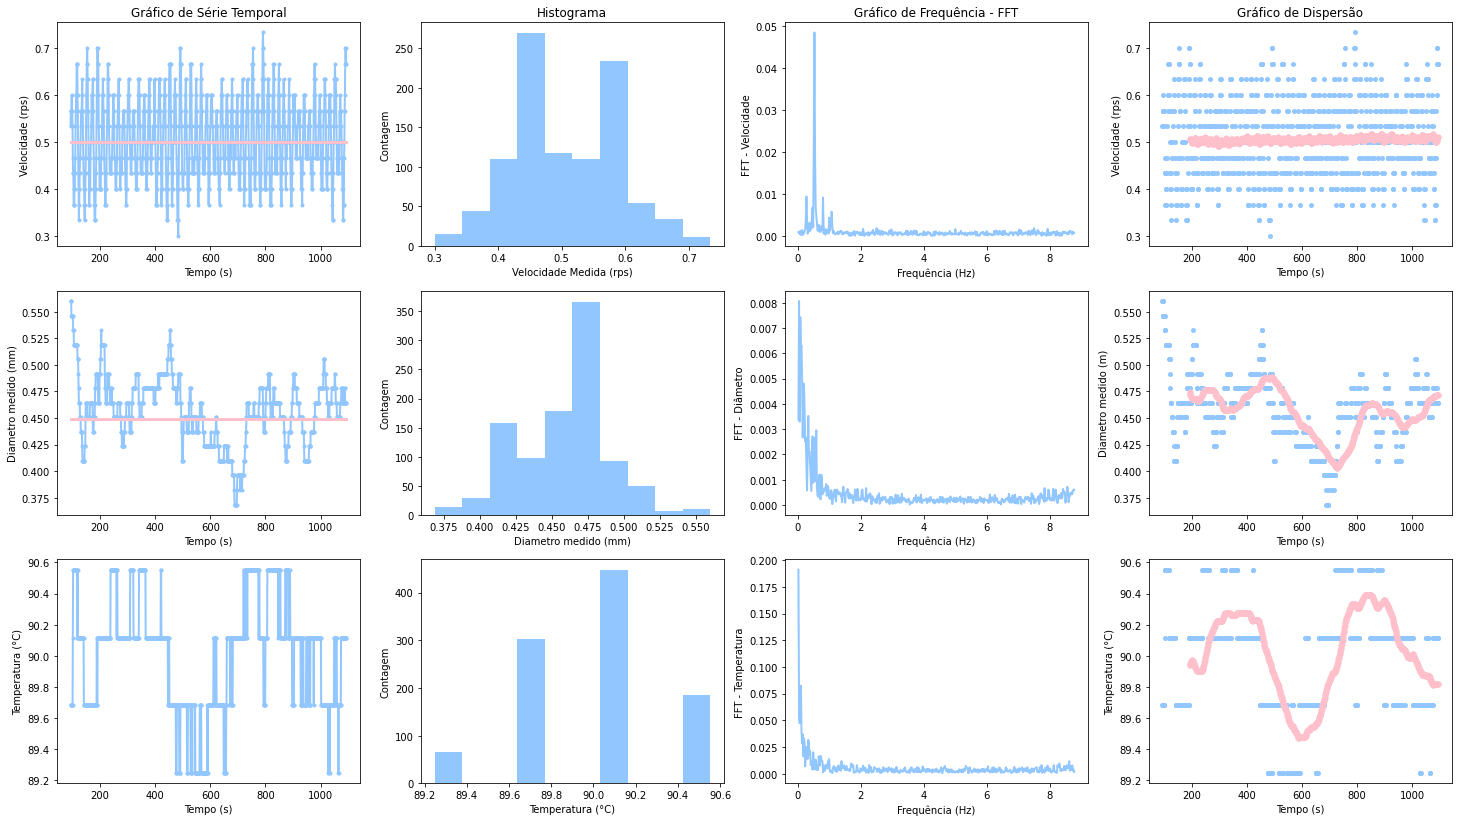

In [6]:
# Representar graficamente as variáveis em função do tempo e incluir a média móvel
print('Nos gráficos a seguir podemos observar o comportamento das variáveis em função do tempo:')
print('')

plt.figure(figsize=(25, 14))

plt.subplot(3, 4, 1)
plt.plot(df[['Tempo - velocidade medida']],df[['Rotações por segundo da bobina  - velocidade medida']],marker='.',linewidth=2)
plt.plot(df[['Tempo - velocidade alvo']],df[['Rotações por segundo da bobina - velocidade alvo']],color = 'pink',linewidth=3)
plt.title('Gráfico de Série Temporal')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (rps)')

plt.subplot(3, 4, 2)
plt.hist(df['Rotações por segundo da bobina  - velocidade medida'])
plt.title('Histograma')
plt.xlabel('Velocidade Medida (rps)')
plt.ylabel('Contagem')

plt.subplot(3, 4, 3)
plt.plot(df_FFT[['Frequencia']].values[1:450],df_FFT[['Amplitude - velocidade medida']].values[1:450],linewidth=2)
plt.title('Gráfico de Frequência - FFT')
plt.xlabel('Frequência (Hz)')
plt.ylabel('FFT - Velocidade')

plt.subplot(3, 4, 4)
plt.scatter(df[['Tempo - velocidade medida']],df[['Rotações por segundo da bobina  - velocidade medida']],marker='.',linewidth=2)
plt.scatter(df[['Tempo - velocidade medida']],df[['Rotações por segundo da bobina  - velocidade medida']].rolling(100).mean(),marker='.',color = 'pink',linewidth=3)
plt.title('Gráfico de Dispersão')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (rps)')

plt.subplot(3, 4, 5)
plt.plot(df[['Tempo - diâmetro medido']],df[['Diâmetro (mm) - diâmetro medido']],marker='.',linewidth=2)
plt.plot(df[['Tempo - diâmetro previsto']],df[['Diâmetro (mm) - diâmetro previsto']],color = 'pink',linewidth=3)
plt.xlabel('Tempo (s)')
plt.ylabel('Diametro medido (mm)')

plt.subplot(3, 4, 6)
plt.hist(df['Diâmetro (mm) - diâmetro medido'])
plt.xlabel('Diametro medido (mm)')
plt.ylabel('Contagem')

plt.subplot(3, 4, 7)
plt.plot(df_FFT[['Frequencia']].values[1:450],df_FFT[['Amplitude - diametro medido']].values[1:450],linewidth=2)
plt.xlabel('Frequência (Hz)')
plt.ylabel('FFT - Diâmetro')

plt.subplot(3, 4, 8)
plt.scatter(df[['Tempo - diâmetro medido']],df[['Diâmetro (mm) - diâmetro medido']],marker='.',linewidth=2)
plt.scatter(df[['Tempo - diâmetro medido']],df[['Diâmetro (mm) - diâmetro medido']].rolling(100).mean(),marker='.',color = 'pink',linewidth=3)
plt.xlabel('Tempo (s)')
plt.ylabel('Diametro medido (m)')

plt.subplot(3, 4, 9)
plt.plot(df[['Tempo - temperatura']],df[['Diâmetro (mm) - temperatura']],marker='.',linewidth=2)
plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura (°C)')

plt.subplot(3, 4, 10)
plt.hist(df['Diâmetro (mm) - temperatura'])
plt.xlabel('Temperatura (°C)')
plt.ylabel('Contagem')

plt.subplot(3, 4, 11)
plt.plot(df_FFT[['Frequencia']].values[1:450],df_FFT[['Amplitude - temperatura']].values[1:450],linewidth=2)
plt.xlabel('Frequência (Hz)')
plt.ylabel('FFT - Temperatura')

plt.subplot(3, 4, 12)
plt.scatter(df[['Tempo - temperatura']],df[['Diâmetro (mm) - temperatura']],marker='.',linewidth=2)
plt.scatter(df[['Tempo - temperatura']],df[['Diâmetro (mm) - temperatura']].rolling(100).mean(),marker='.',color = 'pink',linewidth=3)
plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura (°C)')

plt.show()

In [7]:
# Análise de estatística descritiva
print('Na tabela abaixo podemos observar os dados estatísticos da média, mediana e variância das amostras:')
print('')
df[['Rotações por segundo da bobina  - velocidade medida','Diâmetro (mm) - diâmetro medido','Diâmetro (mm) - temperatura']].describe()

Na tabela abaixo podemos observar os dados estatísticos da média, mediana e variância das amostras:



,Rotações por segundo da bobina - velocidade medida,Diâmetro (mm) - diâmetro medido,Diâmetro (mm) - temperatura
count,1000.000000,1000.000000,1000.000000
mean,0.505467,0.456965,90.010542
std,0.084889,0.031341,0.361317
min,0.300000,0.368600,89.246900
25%,0.433333,0.436952,89.682100
50%,0.500000,0.464293,90.117600
75%,0.566667,0.477963,90.117600
max,0.733333,0.559985,90.553400


In [8]:
# Análise de estatística descritiva - média móvel
print('Na tabela abaixo podemos observar os dados estatísticos da média, mediana e variância para os dados de média móvel:')
print('')

df[['Rotações por segundo da bobina  - velocidade medida','Diâmetro (mm) - diâmetro medido','Diâmetro (mm) - temperatura']].rolling(100).mean().describe()

Na tabela abaixo podemos observar os dados estatísticos da média, mediana e variância para os dados de média móvel:



,Rotações por segundo da bobina - velocidade medida,Diâmetro (mm) - diâmetro medido,Diâmetro (mm) - temperatura
count,901.000000,901.000000,901.000000
mean,0.505144,0.454710,90.016522
std,0.005088,0.020956,0.270269
min,0.491000,0.403323,89.473204
25%,0.501333,0.443103,89.847617
50%,0.505000,0.457868,90.030548
75%,0.509000,0.470171,90.265772
max,0.517667,0.488216,90.392175


**Comentários Gerais: Parte B**

Ao plotar os gráficos de dispersão com os dados originais e os dados da média móvel, observa-se que a curva da média móvel foi suavizada, indicando que os ruídos de alta frequência foram removidos, facilitando assim a observação das tendências e comportamentos da variável. Nesse sentido, é de fundamental importância saber determinar a quantidade de amostras para a média móvel: uma sobreamostragem eliminaria as tendências e poderia acarretar em uma constante, por sua vez, uma subamostragem poderia não eliminar o problema do ruído. Além disso, nos dados de média móvel, podemos observar mais claramente uma relação de causalidade entre temperatura e diâmetro com um atraso temporal.

Ao cálcular a média e o desvio padrão para os dados originais e os dados da média móvel, observamos uma pequna alteração entre eles. A média saí de 0,457 mm para 0,455 mm dos dados originais para os dados de média móvel, o desvio padrão, por sua vez, se vai de 0,031 para 0,021, respectivamente.